# M-dist vs. Euclidean: k-dim

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from htmresearch.support.gridcells.mdist.utils import *
%load_ext autoreload
%autoreload 2


m = 8
S = np.sqrt(2)**np.arange(m)
k = 4
B = create_kd_hyper_module_base(m, k, scale=S)
V = np.zeros((m,k))




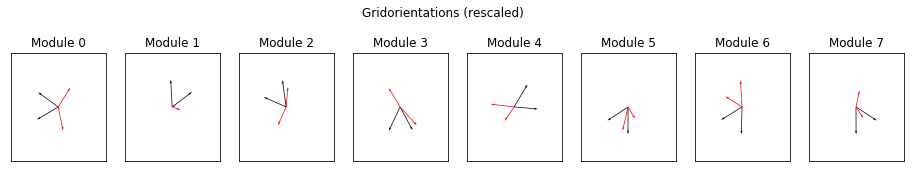

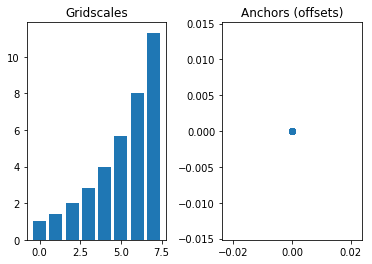

In [2]:
fig, ax = plt.subplots(1, m, figsize=(2*m, 2));
plt.suptitle("Gridorientations (rescaled)", y=1.2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

for i in range(m):
    ax[i].set_title("Module {}".format(i))
    ax[i].set_xlim(-2,2)
    ax[i].set_ylim(-2,2)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

    r1 = B[i,0,:] / S[i]
    r2 = B[i,1,:] / S[i]

    ax[i].quiver(0.0,0.0,r1[:2],r2[:2], angles='xy', scale_units='xy', scale=1)
    for l in range(2,k):
        ax[i].quiver(0.0,0.0,r1[l],r2[l], angles='xy', scale_units='xy', scale=1, color="red")

# plt.savefig("media/summary/{}d_orientations_m{}.pdf".format(k,m), dpi=150)
plt.show()



fig, ax = plt.subplots(1, 2);
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.4, hspace=None)

ax[0].set_title("Gridscales")
ax[0].bar(range(m), S)

ax[1].set_title("Anchors (offsets)")
ax[1].scatter(V[:,0], V[:,1])

# plt.savefig("media/summary/{}d_scales_m{}.pdf".format(k,m), dpi=150)
plt.show()


In [37]:

r_max = 10.
r_mid = 40
N = 200


radii = np.linspace(0.,100., num=200)

# radii = np.concatenate([
#     np.linspace(0.,r_mid, num=N//2),
#     r_mid + np.exp( np.linspace(0., 10., num=N//2) - 1. )
# ])



X_batches = []
Y_batches = []
P_batches = []
Q_batches = []
mdist = [] 
for r in radii:
#     area =2.*np.pi*r**3
#     n = int(min(max(area/5., 500), 10000))
    n = 1000
    X         = np.random.multivariate_normal(mean=np.zeros(k), cov=1000000.*np.eye(k), size=n)
#     X = np.zeros((n,k))
    Direction = np.random.multivariate_normal(mean=np.zeros(k), cov=1*np.eye(k), size=n)
    Direction = Direction/np.linalg.norm(Direction, axis=1, keepdims=True)
    
    X_ = X + r*Direction
    X_batches.append(X [:3] )
    Y_batches.append(X_[:3])
    P_batches.append(map_to_hypertorus(B, V, X ))
    Q_batches.append(map_to_hypertorus(B, V, X_ ))
    
    mdist.append(M_dist(P_batches[-1], Q_batches[-1], S=np.ones(m)))
    
    

X  = np.concatenate(X_batches, axis=0)
X_ = np.concatenate(Y_batches, axis=0)

# X  = np.random.multivariate_normal(mean=np.zeros(k), cov=1.*np.eye(k), size=T)
# X  = np.concatenate( [X ,np.random.multivariate_normal(mean=np.zeros(k), cov=100.*np.eye(k), size=T)], axis=0)

# X_ = np.random.multivariate_normal(mean=np.zeros(k), cov=1.*np.eye(k), size=T)
# X_  = np.concatenate( [X_ ,np.random.multivariate_normal(mean=np.zeros(k), cov=100.*np.eye(k), size=T)], axis=0)


Q  = map_to_hypertorus(B, V, X )
Q_ = map_to_hypertorus(B, V, X_)    
   
# print Q.shape




In [330]:

T = 1000000
r_max = 100.
r_mid = 40
N = 300

radii = np.concatenate([
    np.linspace(0.,r_mid, num=N//2),
    r_mid + np.exp( np.linspace(r_mid, r_mid+10, num=N//2) - r_mid )
])

X  = (np.random.sample((T, k)) - 0.5*np.ones((1,k)))*2.*r_max
X_ = X + (np.random.sample((T, k)) - 0.5*np.ones((1,k)))*2.*r_max

ed = np.linalg.norm(X - X_,  axis=1)

X  = X [np.where(ed <= r_max)]
X_ = X_[np.where(ed <= r_max)]

ed = np.linalg.norm(X - X_,  axis=1)

Q  = map_to_hypertorus(B, V, X )
Q_ = map_to_hypertorus(B, V, X_)    
   
D  = np.digitize(ed, radii)

md = M_dist(Q, Q_, S=S)


y1 = np.zeros(N)
y2 = np.zeros(N)
mu = np.zeros(N)
batches = []

for i, r in enumerate(radii):

    ids = np.where(D==i)[0]
    batch = md[ids]
    
    if len(batch) > 0:
        y1[i] = np.max(batch)
        y2[i] = np.min(batch)
        mu[i] = np.mean(batch)



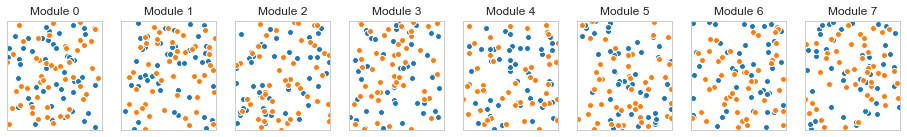

In [38]:



fig, ax = plt.subplots(1, m, figsize=(2*m, 2));
for i in range(m):
    ax[i].set_xlim(0,1)
    ax[i].set_ylim(0,1)

    ax[i].set_xticks([])
    ax[i].set_yticks([])

    ax[i].scatter(Q[:50,i,0],Q[:50,i,1], edgecolor='white')
    ax[i].scatter(Q_[:50,i,0],Q_[:50,i,1], edgecolor='white')
    ax[i].set_title("Module {}".format(i))

plt.show()


In [39]:

md = M_dist(Q, Q_, S=np.ones(m))
ed = np.linalg.norm(X - X_,  axis=1)

# mdc = M_dist_comp(Q, Q_, S=S)
# mu  = np.mean(mdc, axis=1)
# var = np.var(mdc, axis=1)
# C = var

# plt.figure(figsize=(20,10));

# plt.scatter(ed, md, marker="o", alpha=1., edgecolors="white", c=None);
# # plt.scatter(ed, md, marker="o", edgecolors="white", color="black");
# # plt.colorbar()
# plt.ylim(0.)
# # plt.xlim(0.,  80)
# plt.axvline(S[-1]/2., linestyle='--', color="green", label="Half the scale of biggest Module ($s_[]/2$)".format(m))
# plt.axvline(S[-1], linestyle='-', color="green", label="Scale of biggest Module ($s_[]$)".format(m))
# plt.xlabel("Euclidean distance: $d$");
# plt.ylabel("Module distance: $M-dist$");
# plt.legend()
# # plt.savefig("media/summary/{}d_scatter_m{}.png".format(k,m), dpi=150)
# plt.plot( [np.min(x) for x in mdist] )
# plt.plot( [np.mean(x) for x in mdist] )
# plt.plot( [np.max(x) for x in mdist] )

y1 = np.array([np.max(x) for x in mdist])
y2 = np.array([np.min(x) for x in mdist])
mu = np.array([np.mean(x) for x in mdist])
var = np.array([np.var(x) for x in mdist])


# plt.plot(ed)


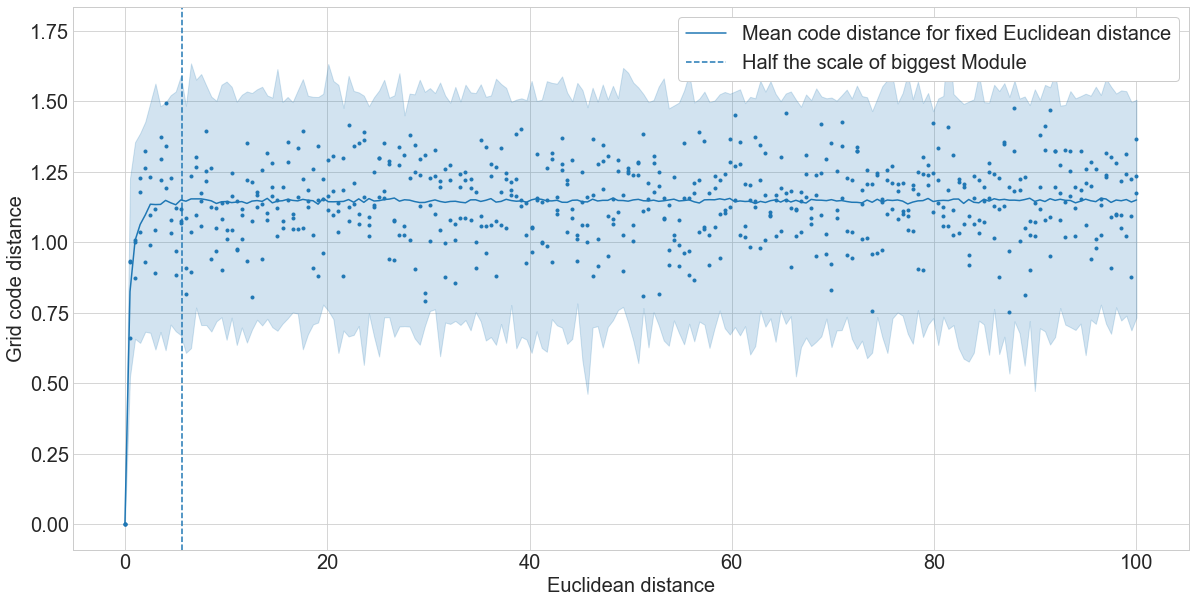

In [40]:
# plt.style.use('ggplot')
# plt.style.use('default')
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10));


# plt.axhline(0.5,linestyle=':', color="C1")
# plt.axhline(0,  linestyle='-', color=c)

plt.fill_between(radii, y1, y2, alpha=.2, color="C0")


fs = 20
c = "C0"
# plt.plot(radii, y1, color="C1", alpha=.1, linestyle="-")
# plt.plot(radii, y2, color="C1", alpha=.1, linestyle="-")
plt.plot(radii, mu, color=c, label="Mean code distance for fixed Euclidean distance")
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.scatter(ed[:1000], md[:1000], marker=".", color="C0");

# plt.ylim(0.)
# plt.xlim(0.)


plt.axvline(S[-1]/2.,linestyle='--', color=c, label="Half the scale of biggest Module".format(m))

# plt.axvline(S[-1], linestyle='-', color=c, label="Scale of biggest Module ($s_[]$)".format(m))
plt.xlabel("Euclidean distance", fontsize=fs);
plt.ylabel("Grid code distance",    fontsize=fs);
plt.legend(frameon=True, framealpha=1., fontsize=fs, loc="upper right")
# plt.axhline(0.,linestyle='-', color=c, linewidth=1.)
# plt.axvline(0.,linestyle='-', color=c, linewidth=1.)
plt.savefig("scatter.png", dpi=300, bbox_inches='tight')
plt.show()
